<a href="https://colab.research.google.com/github/beyzanurbayir/PythonProjects/blob/master/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Alıştırması

Bu kod, başlangıç seviyede bir makine öğrenmesi modelinin performansını değerlendirmek için yazılmıştır.

İlk olarak, verinin okunması ve işlenmesiyle başlarız; bu aşamada verideki eksik değerler tespit edilir ve yerlerine sütunlardaki mevcut değerlerin ortalaması ile doldurulur.

 Veriyi eğitim ve test setlerine böleriz ki modelimizi eğitim verileriyle eğitebilelim ve test verileriyle değerlendirebilelim.

  Modeli eğittikten sonra, Mean Squared Error (MSE) gibi performans metriklerini kullanarak modelimizin tahminlerinin doğruluğunu ölçeriz. MSE, tahminlerin gerçek değerlerden ne kadar uzaklaştığını gösterir; daha düşük MSE, modelin daha doğru tahminler yaptığını işaret eder. Bu işlemler, modelin veri üzerinde nasıl performans gösterdiğini anlamamıza ve gerektiğinde model üzerinde iyileştirmeler yapmamıza yardımcı olur.

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [45]:
data=pd.read_excel('OrnekData.xls')
print(data.isnull().sum())      # Veri setindeki her sütunda bulunan eksik (NaN) değerlerin sayısını gösterir.

Country name                                  0
Ladder score                                  0
upperwhisker                                  0
lowerwhisker                                  0
Explained by: Log GDP per capita              3
Explained by: Social support                  3
Explained by: Healthy life expectancy         3
Explained by: Freedom to make life choices    3
Explained by: Generosity                      3
Explained by: Perceptions of corruption       3
Dystopia + residual                           3
dtype: int64


In [47]:
print(data.head())        # Veri setinin ilk 5 satırını gösterir.

  Country name  Ladder score  upperwhisker  lowerwhisker  \
0      Finland        7.7407      7.814808      7.666591   
1      Denmark        7.5827      7.665297      7.500103   
2      Iceland        7.5251      7.617527      7.432673   
3       Sweden        7.3441      7.421563      7.266637   
4       Israel        7.3411      7.405165      7.277036   

   Explained by: Log GDP per capita  Explained by: Social support  \
0                          1.844054                      1.572367   
1                          1.907798                      1.520361   
2                          1.880718                      1.616525   
3                          1.878146                      1.500826   
4                          1.802934                      1.512793   

   Explained by: Healthy life expectancy  \
0                               0.694793   
1                               0.698944   
2                               0.718345   
3                               0.723871   
4   

In [48]:
from sklearn.impute import SimpleImputer

# Eksik Verileri Doldurmak İçin Bir Imputer Oluştur
imputer = SimpleImputer(strategy='mean')

# Özellikleri Doldur
X = imputer.fit_transform(X)

In [49]:
# Özellikler ve Etiketler
X = data[['Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual']]
y = data['Ladder score']


In [50]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
print(X_train.isnull().sum())


Explained by: Log GDP per capita              3
Explained by: Social support                  3
Explained by: Healthy life expectancy         3
Explained by: Freedom to make life choices    3
Explained by: Generosity                      3
Explained by: Perceptions of corruption       3
Dystopia + residual                           3
dtype: int64


In [52]:
from sklearn.impute import SimpleImputer

# Imputer Oluştur ve Veriyi Doldur
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Modeli Oluştur
model = LinearRegression()

# Modeli Eğitim Verisi ile Eğit
model.fit(X_train, y_train)

# Test Verisi ile Tahmin Yap
y_pred = model.predict(x_test)

# Performansı Değerlendir
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 1.168140051577991e-05
R^2 Score: 0.999990200690225


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


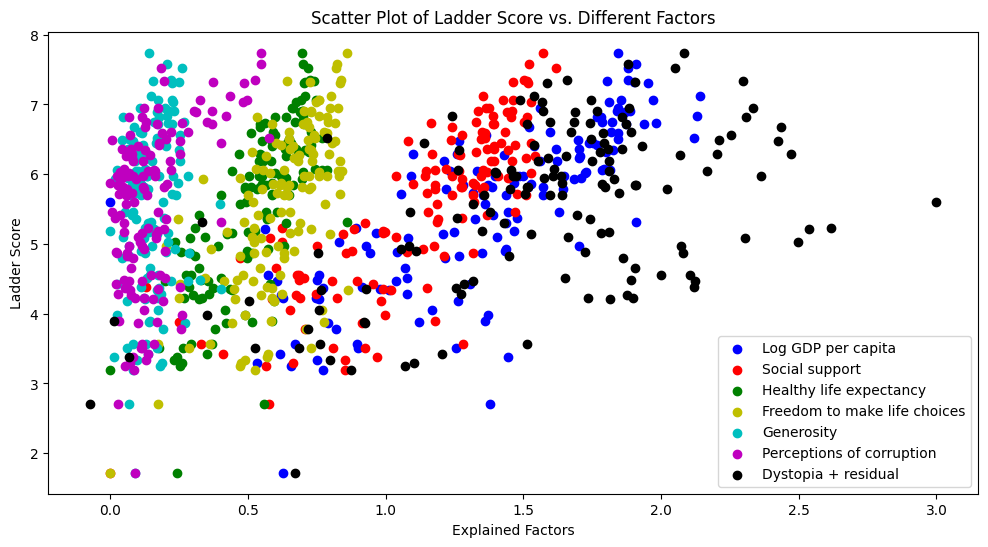

In [54]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(data['Explained by: Log GDP per capita'], data['Ladder score'], color='b', label='Log GDP per capita')
plt.scatter(data['Explained by: Social support'], data['Ladder score'], color='r', label='Social support')
plt.scatter(data['Explained by: Healthy life expectancy'], data['Ladder score'], color='g', label='Healthy life expectancy')
plt.scatter(data['Explained by: Freedom to make life choices'], data['Ladder score'], color='y', label='Freedom to make life choices')
plt.scatter(data['Explained by: Generosity'], data['Ladder score'], color='c', label='Generosity')
plt.scatter(data['Explained by: Perceptions of corruption'], data['Ladder score'], color='m', label='Perceptions of corruption')
plt.scatter(data['Dystopia + residual'], data['Ladder score'], color='k', label='Dystopia + residual')

plt.xlabel('Explained Factors')
plt.ylabel('Ladder Score')
plt.title('Scatter Plot of Ladder Score vs. Different Factors')
plt.legend()
plt.show()
